In [1]:
import pandas as pd
import data_loader as dl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

RDKit WARNING: [08:19:12] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def count_Y(row):
    count = row['Matched Ion Series'].count("y")
    return(count)

def count_B(row):
    count = row['Matched Ion Series'].count("b")
    return(count)

def count_peaks(df):
    #count y and b peaks
    df = df.assign(b_peaks=df.apply(count_B, axis=1))
    df = df.assign(y_peaks=df.apply(count_Y, axis=1))
    return(df)

# Get Data
- Read in data
- Filter based on retetion time gradient 
- count peaks

In [3]:
#Read in data
bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')[['peptide','minute','Matched Ion Series','QValue']]
bulk_rep2 = dl.load_joined_psm_mzml('bulk_rep2')[['peptide','minute','Matched Ion Series','QValue']]
bulk_rep3 = dl.load_joined_psm_mzml('bulk_rep3')[['peptide','minute','Matched Ion Series','QValue']]

rep1_2ng = dl.load_joined_psm_mzml("2ng_rep1")[['peptide','minute','Matched Ion Series','QValue']]
rep2_2ng = dl.load_joined_psm_mzml("2ng_rep2")[['peptide','minute','Matched Ion Series','QValue']]
rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")[['peptide','minute','Matched Ion Series','QValue']]
rep4_2ng = dl.load_joined_psm_mzml("2ng_rep4")[['peptide','minute','Matched Ion Series','QValue']]
rep5_2ng = dl.load_joined_psm_mzml("2ng_rep5")[['peptide','minute','Matched Ion Series','QValue']]
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")[['peptide','minute','Matched Ion Series','QValue']]

rep1_02ng = dl.load_joined_psm_mzml("0.2ng_rep1")[['peptide','minute','Matched Ion Series','QValue']]
rep2_02ng = dl.load_joined_psm_mzml("0.2ng_rep2")[['peptide','minute','Matched Ion Series','QValue']]
rep3_02ng = dl.load_joined_psm_mzml("0.2ng_rep3")[['peptide','minute','Matched Ion Series','QValue']]
rep4_02ng = dl.load_joined_psm_mzml("0.2ng_rep4")[['peptide','minute','Matched Ion Series','QValue']]
rep5_02ng = dl.load_joined_psm_mzml("0.2ng_rep5")[['peptide','minute','Matched Ion Series','QValue']]
rep6_02ng = dl.load_joined_psm_mzml("0.2ng_rep6")[['peptide','minute','Matched Ion Series','QValue']]

rep1_sc = dl.load_joined_psm_mzml("sc_rep1")[['peptide','minute','Matched Ion Series','QValue']]
rep2_sc = dl.load_joined_psm_mzml("sc_rep2")[['peptide','minute','Matched Ion Series','QValue']]
rep3_sc = dl.load_joined_psm_mzml("sc_rep3")[['peptide','minute','Matched Ion Series','QValue']]
rep4_sc = dl.load_joined_psm_mzml("sc_rep4")[['peptide','minute','Matched Ion Series','QValue']]
rep5_sc = dl.load_joined_psm_mzml("sc_rep5")[['peptide','minute','Matched Ion Series','QValue']]


In [4]:
#filter based on retention time gradient
rep1_2ng = rep1_2ng[(rep1_2ng['minute'] < 95) & (rep1_2ng['minute'] >= 27)]
rep2_2ng = rep2_2ng[(rep2_2ng['minute'] < 95) & (rep2_2ng['minute'] >=27)]
rep3_2ng = rep3_2ng[(rep3_2ng['minute'] < 93) & (rep3_2ng['minute'] >=32)]
rep4_2ng = rep4_2ng[(rep4_2ng['minute'] < 91) & (rep4_2ng['minute'] >=32)]
rep5_2ng = rep5_2ng[(rep5_2ng['minute'] < 99) & (rep5_2ng['minute'] >=31)]
rep6_2ng = rep6_2ng[(rep6_2ng['minute'] < 98) & (rep6_2ng['minute'] >=31)]

rep1_02ng = rep1_02ng[(rep1_02ng['minute'] < 94) & (rep1_02ng['minute'] >=28)]
rep2_02ng = rep2_02ng[(rep2_02ng['minute'] < 95) & (rep2_02ng['minute'] >=27)]
rep3_02ng = rep3_02ng[(rep3_02ng['minute'] < 98) & (rep3_02ng['minute'] >=32)]
rep4_02ng = rep4_02ng[(rep4_02ng['minute'] < 98) & (rep4_02ng['minute'] >=32)]
rep5_02ng = rep5_02ng[(rep5_02ng['minute'] < 109) & (rep5_02ng['minute'] >=35)]
rep6_02ng = rep6_02ng[(rep6_02ng['minute'] < 109) & (rep6_02ng['minute'] >=35)]

#POSSIBLY FILTER RETENTION TIME FOR SINGLE CELL DATA AS WELL

In [5]:
#count peaks
bulk_rep1 = count_peaks(bulk_rep1)
bulk_rep2 = count_peaks(bulk_rep2)
bulk_rep3 = count_peaks(bulk_rep3)

rep1_2ng = count_peaks(rep1_2ng)
rep2_2ng = count_peaks(rep2_2ng)
rep3_2ng = count_peaks(rep3_2ng)
rep4_2ng = count_peaks(rep4_2ng)
rep5_2ng = count_peaks(rep5_2ng)
rep6_2ng = count_peaks(rep6_2ng)

rep1_02ng = count_peaks(rep1_02ng)
rep2_02ng = count_peaks(rep2_02ng)
rep3_02ng = count_peaks(rep3_02ng)
rep4_02ng = count_peaks(rep4_02ng)
rep5_02ng = count_peaks(rep5_02ng)
rep6_02ng = count_peaks(rep6_02ng)

rep1_sc = count_peaks(rep1_sc)
rep2_sc = count_peaks(rep2_sc)
rep3_sc = count_peaks(rep3_sc)
rep4_sc = count_peaks(rep4_sc)
rep5_sc = count_peaks(rep5_sc)

In [6]:
#seprate good and medicore spectra
bulk_rep1_good = bulk_rep1[bulk_rep1['QValue'] <= .01][['peptide','y_peaks']]
bulk_rep2_good = bulk_rep2[bulk_rep2['QValue'] <= .01][['peptide','y_peaks']]
bulk_rep3_good = bulk_rep3[bulk_rep3['QValue'] <= .01][['peptide','y_peaks']]

rep1_2ng_good = rep1_2ng[rep1_2ng['QValue'] <= .01][['peptide','y_peaks']]
rep2_2ng_good = rep2_2ng[rep2_2ng['QValue'] <= .01][['peptide','y_peaks']]
rep3_2ng_good = rep3_2ng[rep3_2ng['QValue'] <= .01][['peptide','y_peaks']]
rep4_2ng_good = rep4_2ng[rep4_2ng['QValue'] <= .01][['peptide','y_peaks']]
rep5_2ng_good = rep5_2ng[rep5_2ng['QValue'] <= .01][['peptide','y_peaks']]
rep6_2ng_good = rep6_2ng[rep6_2ng['QValue'] <= .01][['peptide','y_peaks']]

rep1_02ng_good = rep1_02ng[rep1_02ng['QValue'] <= .01][['peptide','y_peaks']]
rep2_02ng_good = rep2_02ng[rep2_02ng['QValue'] <= .01][['peptide','y_peaks']]
rep3_02ng_good = rep3_02ng[rep3_02ng['QValue'] <= .01][['peptide','y_peaks']]
rep4_02ng_good = rep4_02ng[rep4_02ng['QValue'] <= .01][['peptide','y_peaks']]
rep5_02ng_good = rep5_02ng[rep5_02ng['QValue'] <= .01][['peptide','y_peaks']]
rep6_02ng_good = rep6_02ng[rep6_02ng['QValue'] <= .01][['peptide','y_peaks']]

rep1_sc_good = rep1_sc[rep1_sc['QValue'] <= .01][['peptide','y_peaks']]
rep2_sc_good = rep2_sc[rep2_sc['QValue'] <= .01][['peptide','y_peaks']]
rep3_sc_good = rep3_sc[rep3_sc['QValue'] <= .01][['peptide','y_peaks']]
rep4_sc_good = rep4_sc[rep4_sc['QValue'] <= .01][['peptide','y_peaks']]
rep5_sc_good = rep5_sc[rep5_sc['QValue'] <= .01][['peptide','y_peaks']]


rep1_2ng_med = rep1_2ng[(rep1_2ng['QValue'] > .01) & (rep1_2ng['QValue'] <= .2)][['peptide','y_peaks']]
rep2_2ng_med = rep2_2ng[(rep2_2ng['QValue'] > .01) & (rep2_2ng['QValue'] <= .2)][['peptide','y_peaks']]
rep3_2ng_med = rep3_2ng[(rep3_2ng['QValue'] > .01) & (rep3_2ng['QValue'] <= .2)][['peptide','y_peaks']]
rep4_2ng_med = rep4_2ng[(rep4_2ng['QValue'] > .01) & (rep4_2ng['QValue'] <= .2)][['peptide','y_peaks']]
rep5_2ng_med = rep5_2ng[(rep5_2ng['QValue'] > .01) & (rep5_2ng['QValue'] <= .2)][['peptide','y_peaks']]
rep6_2ng_med = rep6_2ng[(rep6_2ng['QValue'] > .01) & (rep6_2ng['QValue'] <= .2)][['peptide','y_peaks']]

rep1_02ng_med = rep1_02ng[(rep1_02ng['QValue'] > .01) & (rep1_02ng['QValue'] <= .2)][['peptide','y_peaks']]
rep2_02ng_med = rep2_02ng[(rep2_02ng['QValue'] > .01) & (rep2_02ng['QValue'] <= .2)][['peptide','y_peaks']]
rep3_02ng_med = rep3_02ng[(rep3_02ng['QValue'] > .01) & (rep3_02ng['QValue'] <= .2)][['peptide','y_peaks']][['peptide','y_peaks']]
rep4_02ng_med = rep4_02ng[(rep4_02ng['QValue'] > .01) & (rep4_02ng['QValue'] <= .2)][['peptide','y_peaks']]
rep5_02ng_med = rep5_02ng[(rep5_02ng['QValue'] > .01) & (rep5_02ng['QValue'] <= .2)][['peptide','y_peaks']]
rep6_02ng_med = rep6_02ng[(rep6_02ng['QValue'] > .01) & (rep6_02ng['QValue'] <= .2)][['peptide','y_peaks']]

rep1_sc_med = rep1_sc[(rep1_sc['QValue'] > .01) & (rep1_sc['QValue'] <= .2)][['peptide','y_peaks']]
rep2_sc_med = rep2_sc[(rep2_sc['QValue'] > .01) & (rep2_sc['QValue'] <= .2)][['peptide','y_peaks']]
rep3_sc_med = rep3_sc[(rep3_sc['QValue'] > .01) & (rep3_sc['QValue'] <= .2)][['peptide','y_peaks']]
rep4_sc_med = rep4_sc[(rep4_sc['QValue'] > .01) & (rep4_sc['QValue'] <= .2)][['peptide','y_peaks']]
rep5_sc_med = rep5_sc[(rep5_sc['QValue'] > .01) & (rep5_sc['QValue'] <= .2)][['peptide','y_peaks']]


In [7]:
#for each file count how many peaks y peaks there are for each time a peptide is seen
bulk_rep1_good = bulk_rep1_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep2_good = bulk_rep2_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep3_good = bulk_rep3_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_good = rep1_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_good = rep2_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_good = rep3_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_good = rep4_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_good = rep5_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_good = rep6_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_med = rep1_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_med = rep2_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_med = rep3_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_med = rep4_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_med = rep5_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_med = rep6_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_good = rep1_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_good = rep2_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_good = rep3_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_good = rep4_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_good = rep5_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_good = rep6_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_med = rep1_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_med = rep2_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_med = rep3_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_med = rep4_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_med = rep5_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_med = rep6_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_sc_good = rep1_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_sc_good = rep2_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_sc_good = rep3_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_sc_good = rep4_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_sc_good = rep5_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_sc_good = rep1_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_sc_good = rep2_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_sc_good = rep3_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_sc_good = rep4_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_sc_good = rep5_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()


In [8]:
#change index to be peptide
bulk_rep1_good = bulk_rep1_good.set_index("peptide")
bulk_rep2_good = bulk_rep2_good.set_index("peptide")
bulk_rep3_good = bulk_rep3_good.set_index("peptide")

rep1_2ng_good = rep1_2ng_good.set_index("peptide")
rep2_2ng_good = rep2_2ng_good.set_index("peptide")
rep3_2ng_good = rep3_2ng_good.set_index("peptide")
rep4_2ng_good = rep4_2ng_good.set_index("peptide")
rep5_2ng_good = rep5_2ng_good.set_index("peptide")
rep6_2ng_good = rep6_2ng_good.set_index("peptide")
rep1_2ng_med = rep1_2ng_med.set_index("peptide")
rep2_2ng_med = rep2_2ng_med.set_index("peptide")
rep3_2ng_med = rep3_2ng_med.set_index("peptide")
rep4_2ng_med = rep4_2ng_med.set_index("peptide")
rep5_2ng_med = rep5_2ng_med.set_index("peptide")
rep6_2ng_med = rep6_2ng_med.set_index("peptide")

rep1_02ng_good = rep1_02ng_good.set_index("peptide")
rep2_02ng_good = rep2_02ng_good.set_index("peptide")
rep3_02ng_good = rep3_02ng_good.set_index("peptide")
rep4_02ng_good = rep4_02ng_good.set_index("peptide")
rep5_02ng_good = rep5_02ng_good.set_index("peptide")
rep6_02ng_good = rep6_02ng_good.set_index("peptide")
rep1_02ng_med = rep1_02ng_med.set_index("peptide")
rep2_02ng_med = rep2_02ng_med.set_index("peptide")
rep3_02ng_med = rep3_02ng_med.set_index("peptide")
rep4_02ng_med = rep4_02ng_med.set_index("peptide")
rep5_02ng_med = rep5_02ng_med.set_index("peptide")
rep6_02ng_med = rep6_02ng_med.set_index("peptide")

rep1_sc_good = rep1_sc_good.set_index("peptide")
rep2_sc_good = rep2_sc_good.set_index("peptide")
rep3_sc_good = rep3_sc_good.set_index("peptide")
rep4_sc_good = rep4_sc_good.set_index("peptide")
rep5_sc_good = rep5_sc_good.set_index("peptide")
rep1_sc_med = rep1_sc_med.set_index("peptide")
rep2_sc_med = rep2_sc_med.set_index("peptide")
rep3_sc_med = rep3_sc_med.set_index("peptide")
rep4_sc_med = rep4_sc_med.set_index("peptide")
rep5_sc_med = rep5_sc_med.set_index("peptide")


In [9]:
#merge
#at this point bulk has been filtered for quality scans
bulk_allreps = pd.concat([bulk_rep1_good, bulk_rep2_good], join='outer')
bulk_allreps = pd.concat([bulk_allreps, bulk_rep3_good], join='outer')

allreps_2ng_good = pd.concat([rep1_2ng_good, rep2_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep3_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep4_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep5_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep6_2ng_good], join='outer')

allreps_02ng_good = pd.concat([rep1_02ng_good, rep2_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep3_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep4_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep5_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep6_02ng_good], join='outer')

allreps_sc_good = pd.concat([rep1_sc_good, rep2_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep3_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep4_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep5_sc_good], join='outer')


allreps_2ng_med = pd.concat([rep1_2ng_med, rep2_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep3_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep4_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep5_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep6_2ng_med], join='outer')

allreps_02ng_med = pd.concat([rep1_02ng_med, rep2_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep3_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep4_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep5_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep6_02ng_med], join='outer')

allreps_sc_med = pd.concat([rep1_sc_med, rep2_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep3_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep4_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep5_sc_med], join='outer')



In [10]:
bulk_allreps = bulk_allreps.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_good = allreps_2ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_med = allreps_2ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_good = allreps_02ng_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_med = allreps_02ng_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_sc_good = allreps_sc_good.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_sc_med = allreps_sc_med.groupby(['peptide'])['y_peaks'].apply(lambda x: ','.join(x.astype(str))).reset_index()


In [11]:
def calc_aver_peaks(row):
    all_counts = row['y_peaks']
    all_counts = all_counts.split(',')
    all_counts = list(map(int, all_counts))
    count_mean = np.nanmean(all_counts)
    count_mean = round(count_mean) #round the mean to the nearest int. Note that 6.5 will round to 6
    return count_mean


In [12]:
def calc_peak_count_sd(row):
    all_counts = row['y_peaks']
    all_counts = all_counts.split(',')
    all_counts = list(map(int, all_counts))
    count_sd = np.nanstd(all_counts)
    return count_sd



In [13]:
bulk_allreps['sd_Ypeaks'] = bulk_allreps.apply(calc_peak_count_sd, axis=1)
allreps_2ng_good['sd_Ypeaks'] = allreps_2ng_good.apply(calc_peak_count_sd, axis=1)
allreps_2ng_med['sd_Ypeaks'] = allreps_2ng_med.apply(calc_peak_count_sd, axis=1)
allreps_02ng_good['sd_Ypeaks'] = allreps_02ng_good.apply(calc_peak_count_sd, axis=1)
allreps_02ng_med['sd_Ypeaks'] = allreps_02ng_med.apply(calc_peak_count_sd, axis=1)
allreps_sc_good['sd_Ypeaks'] = allreps_sc_good.apply(calc_peak_count_sd, axis=1)
allreps_sc_med['sd_Ypeaks'] = allreps_sc_med.apply(calc_peak_count_sd, axis=1)


In [14]:
bulk_allreps['mean_Ypeaks'] = bulk_allreps.apply(calc_aver_peaks, axis=1)
allreps_2ng_good['mean_Ypeaks'] = allreps_2ng_good.apply(calc_aver_peaks, axis=1)
allreps_2ng_med['mean_Ypeaks'] = allreps_2ng_med.apply(calc_aver_peaks, axis=1)
allreps_02ng_good['mean_Ypeaks'] = allreps_02ng_good.apply(calc_aver_peaks, axis=1)
allreps_02ng_med['mean_Ypeaks'] = allreps_02ng_med.apply(calc_aver_peaks, axis=1)
allreps_sc_good['mean_Ypeaks'] = allreps_sc_good.apply(calc_aver_peaks, axis=1)
allreps_sc_med['mean_Ypeaks'] = allreps_sc_med.apply(calc_aver_peaks, axis=1)


In [15]:
bulk_allreps = bulk_allreps.set_index("peptide")
allreps_2ng_good = allreps_2ng_good.set_index("peptide")
allreps_2ng_med = allreps_2ng_med.set_index("peptide")
allreps_02ng_good = allreps_02ng_good.set_index("peptide")
allreps_02ng_med = allreps_02ng_med.set_index("peptide")
allreps_sc_good = allreps_sc_good.set_index("peptide")
allreps_sc_med = allreps_sc_med.set_index("peptide")


In [16]:
#outer join all together based on peptide
bulk_allreps.columns = [str(col) + '_bulk' for col in bulk_allreps.columns]
allreps_2ng_good.columns = [str(col) + '_2ng_good' for col in allreps_2ng_good.columns]
allreps_2ng_med.columns = [str(col) + '_2ng_med' for col in allreps_2ng_med.columns]
allreps_02ng_good.columns = [str(col) + '_0.2ng_good' for col in allreps_02ng_good.columns]
allreps_02ng_med.columns = [str(col) + '_0.2ng_med' for col in allreps_02ng_med.columns]
allreps_sc_good.columns = [str(col) + '_sc_good' for col in allreps_sc_good.columns]
allreps_sc_med.columns = [str(col) + '_sc_med' for col in allreps_sc_med.columns]


megatable = pd.concat([bulk_allreps, allreps_2ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_2ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_sc_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_sc_med], axis=1, join='outer')

In [17]:
megatable

,y_peaks_bulk,sd_Ypeaks_bulk,mean_Ypeaks_bulk,y_peaks_2ng_good,sd_Ypeaks_2ng_good,mean_Ypeaks_2ng_good,y_peaks_2ng_med,sd_Ypeaks_2ng_med,mean_Ypeaks_2ng_med,y_peaks_0.2ng_good,...,mean_Ypeaks_0.2ng_good,y_peaks_0.2ng_med,sd_Ypeaks_0.2ng_med,mean_Ypeaks_0.2ng_med,y_peaks_sc_good,sd_Ypeaks_sc_good,mean_Ypeaks_sc_good,y_peaks_sc_med,sd_Ypeaks_sc_med,mean_Ypeaks_sc_med
peptide,,,,,,,,,,,,,,,,,,,,,
AAAAAAAAAAAAAAAGAGAGAK,"6,4,10",2.494438,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,"8,15,9,5,6,8,10,9,12,9,8",2.593699,9.0,"2,2,3,2,2,3,2,4,3,3,4",0.749656,3.0,NaN,NaN,NaN,"2,2",...,2.0,NaN,NaN,NaN,"2,2,2,2",0.000000,2.0,"0,0,0,0",0.0,0.0
AAAAAAAAAVSR,"10,10",0.000000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAALQAK,"9,9,9,9,7,9,8,9,8,9,8,9,8,7,9",0.718022,8.0,"7,9,8,5,9,10,4,10,10,10,10,10,9,9,9,9,9,6,10,1...",1.632462,9.0,NaN,NaN,NaN,"9,9,9,9,7,9,9,9",...,9.0,NaN,NaN,NaN,"6,6,7,8,9,9,9,9,9",1.247219,8.0,NaN,NaN,NaN
AAAAATVVPPMVGGPPFVGPVGFGPGDR,"9,13,12,9,12,9,8",1.829464,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRSDGALLLGASSLSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,2.0
YSDRNHQITR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,4,4",0.0,4.0
YSLATEEIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,1.0


# True Single Cell Graph

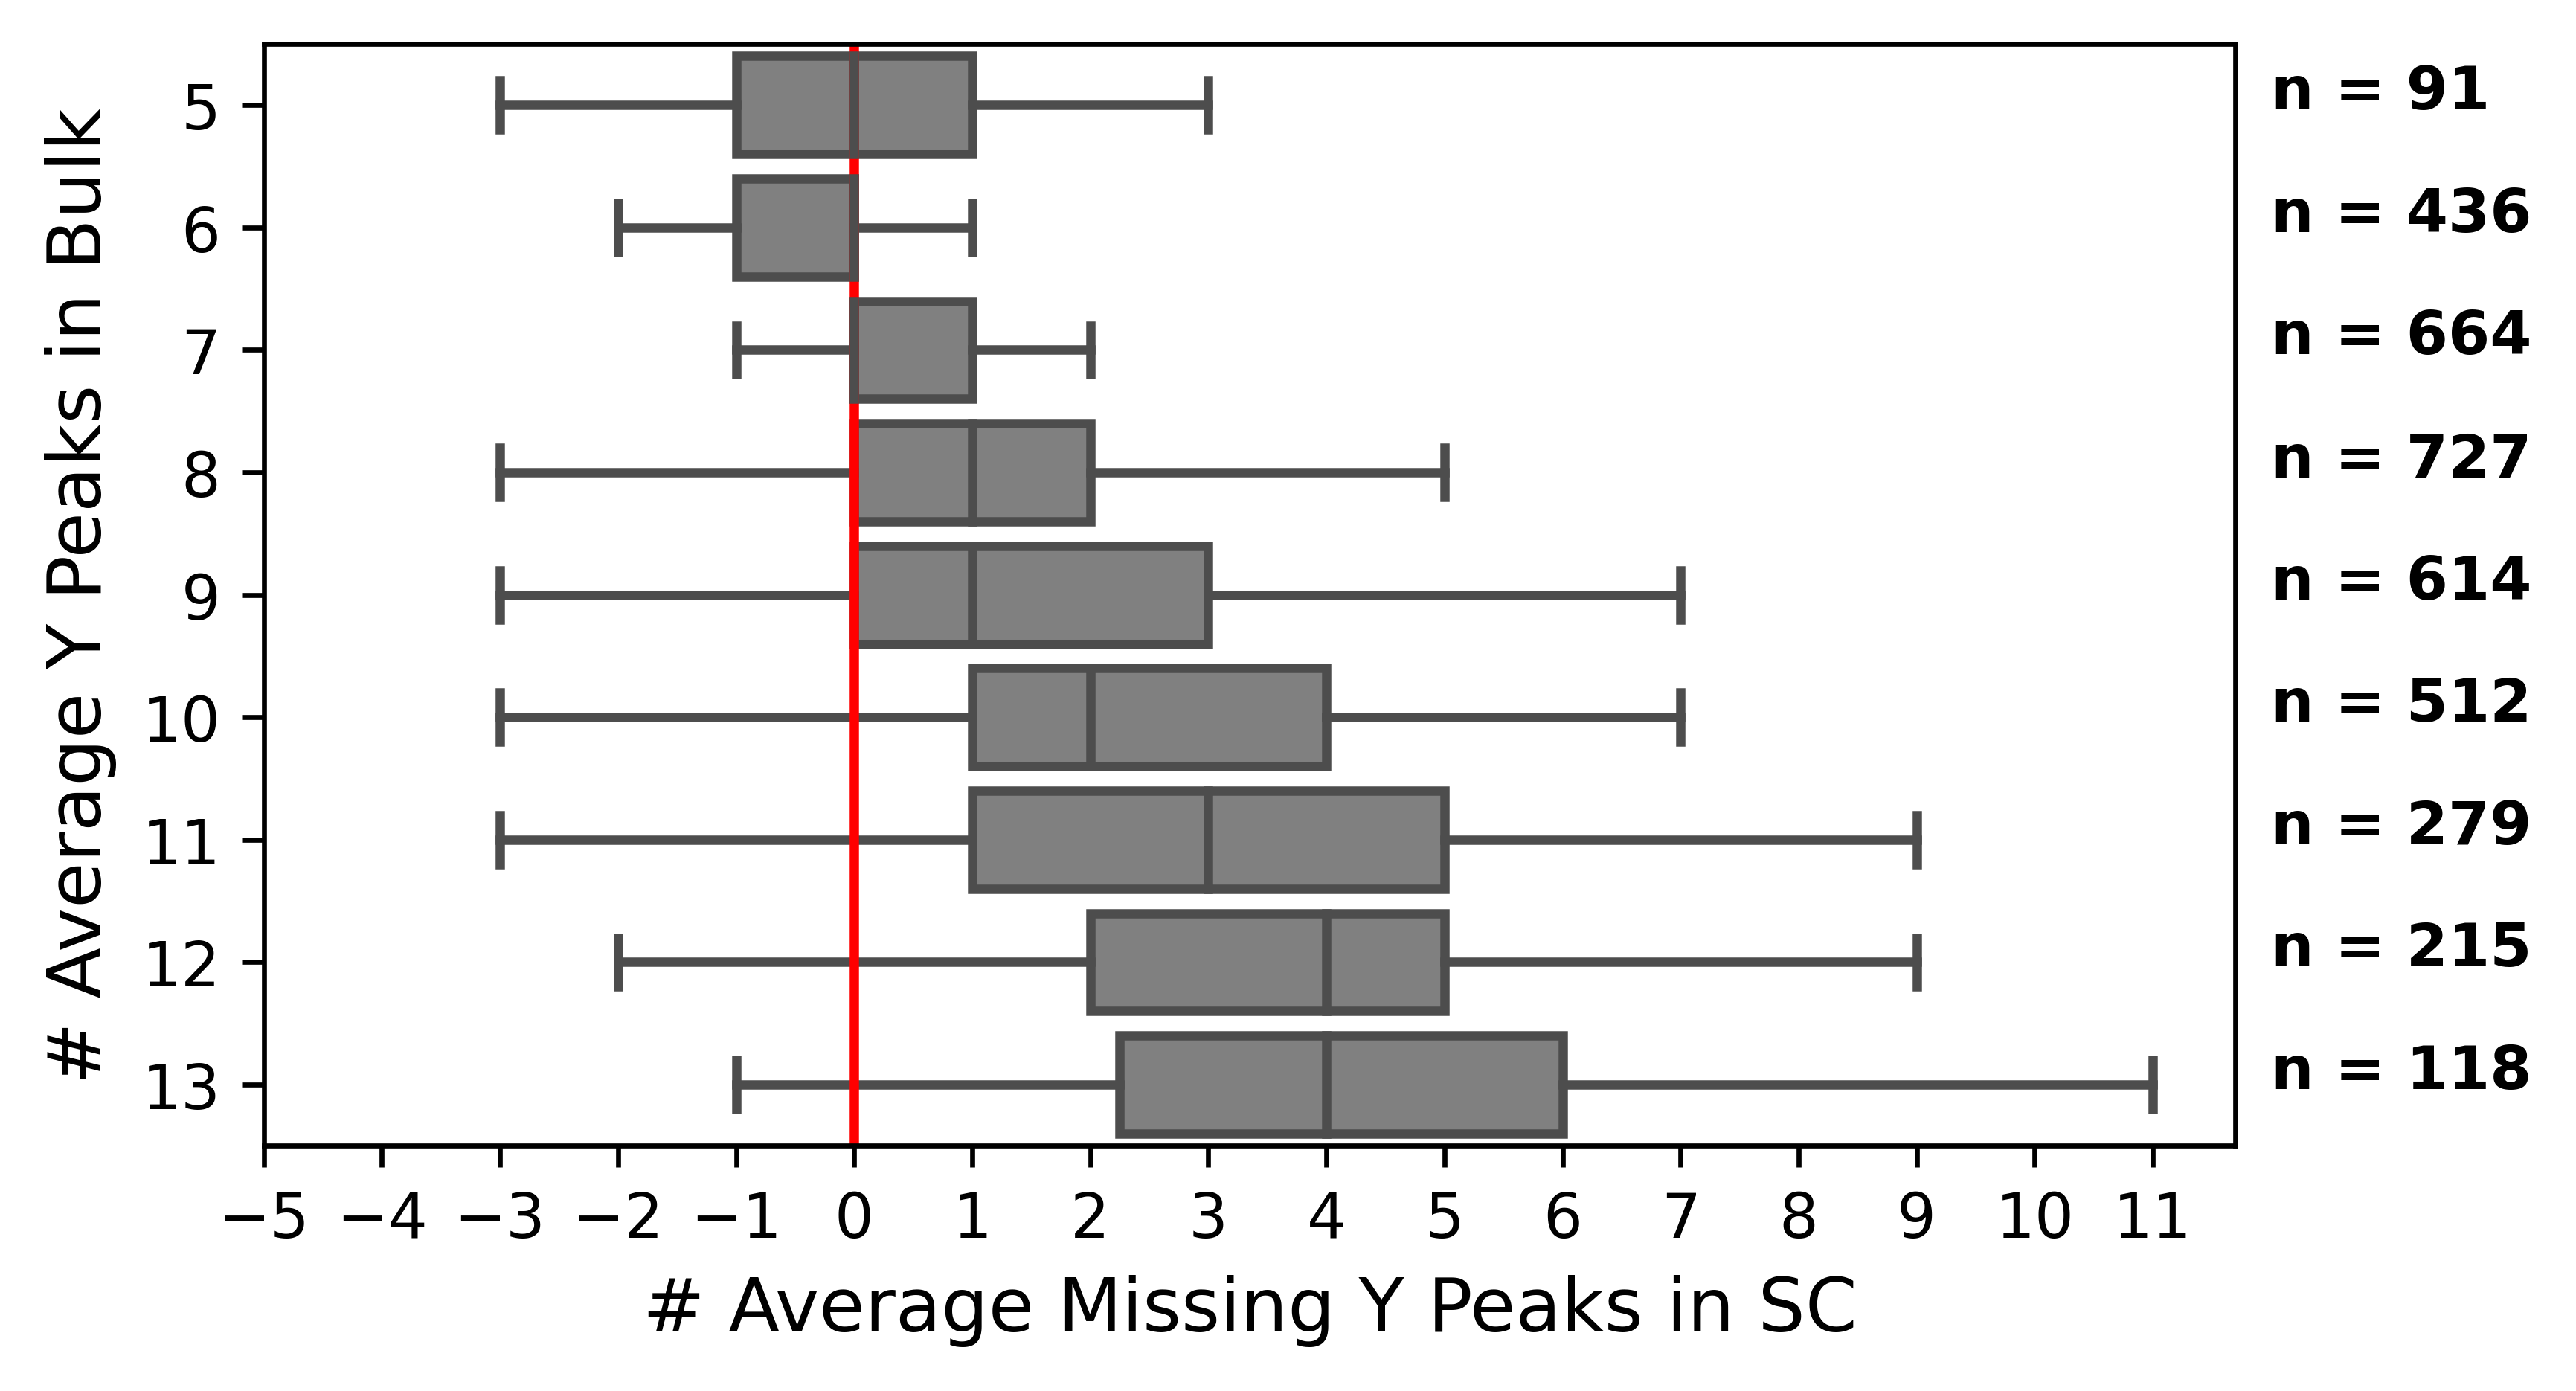

In [117]:
#make 2ng good missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_sc_good"]]
plot_df = plot_df[plot_df['mean_Ypeaks_sc_good'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["sc_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_sc_good']
plot_df[['mean_Ypeaks_bulk','sc_missing']] = plot_df[['mean_Ypeaks_bulk','sc_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','sc_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

# a4_dims = (11.7, 8.27) #dimensions for bigger plot
a4_dims = (5.7, 3.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["sc_missing"] ,y=box_df['mean_Ypeaks_bulk'], color="gray",ax=ax,orient="h",showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y Peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))

#inncrease text size
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rcParams.update({'font.size': 14})

# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['sc_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(12, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold'
           )
    
plt.axvline(x=0, color='red') #vertical line

figsc_good = plt.gcf()
plt.show()

#axis should show nothing less than 100 samples 

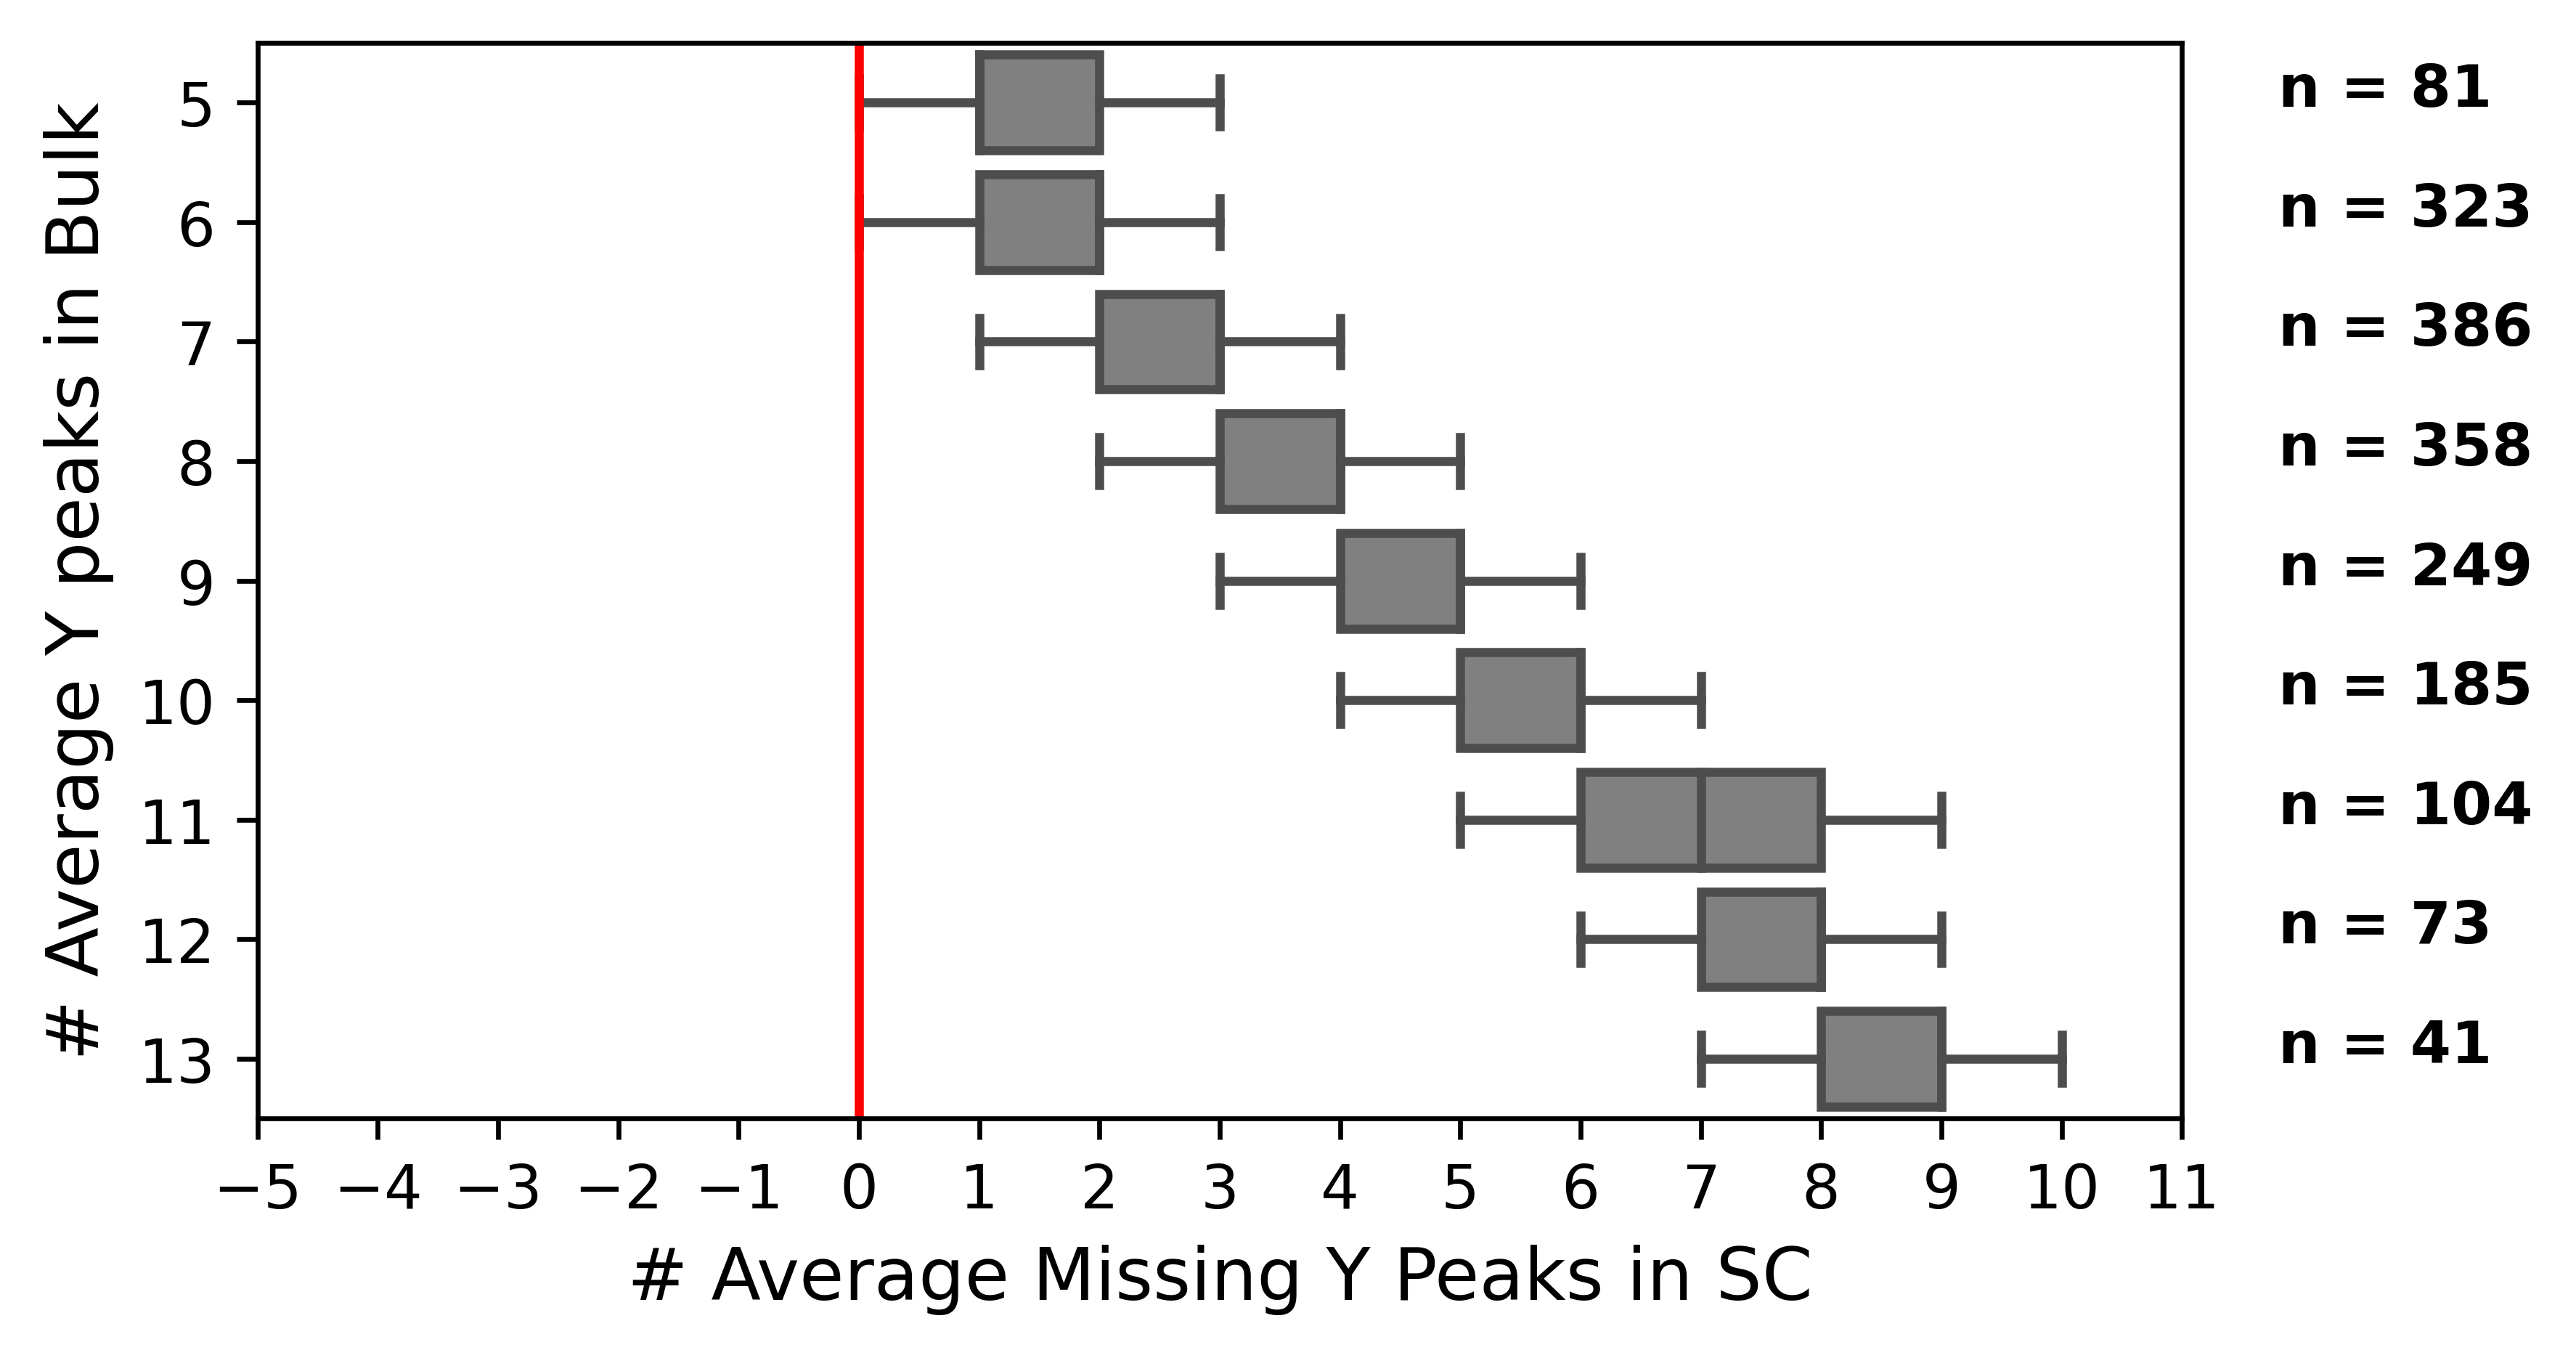

In [118]:
#make sc marginal missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_sc_med"]]
plot_df = plot_df[plot_df['mean_Ypeaks_sc_med'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["sc_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_sc_med']
plot_df[['mean_Ypeaks_bulk','sc_missing']] = plot_df[['mean_Ypeaks_bulk','sc_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','sc_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

a4_dims = (5.7, 3.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["sc_missing"] ,y=box_df['mean_Ypeaks_bulk'], ax=ax,orient="h", color='gray',showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))

#inncrease text size
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 14})

# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['sc_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(11.8, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold')

plt.axvline(x=0, color='red') #vertical line
    
figsc_med = plt.gcf()
plt.show()


#axis should show nothing less than 100 samples 

# Graph for 2ng data

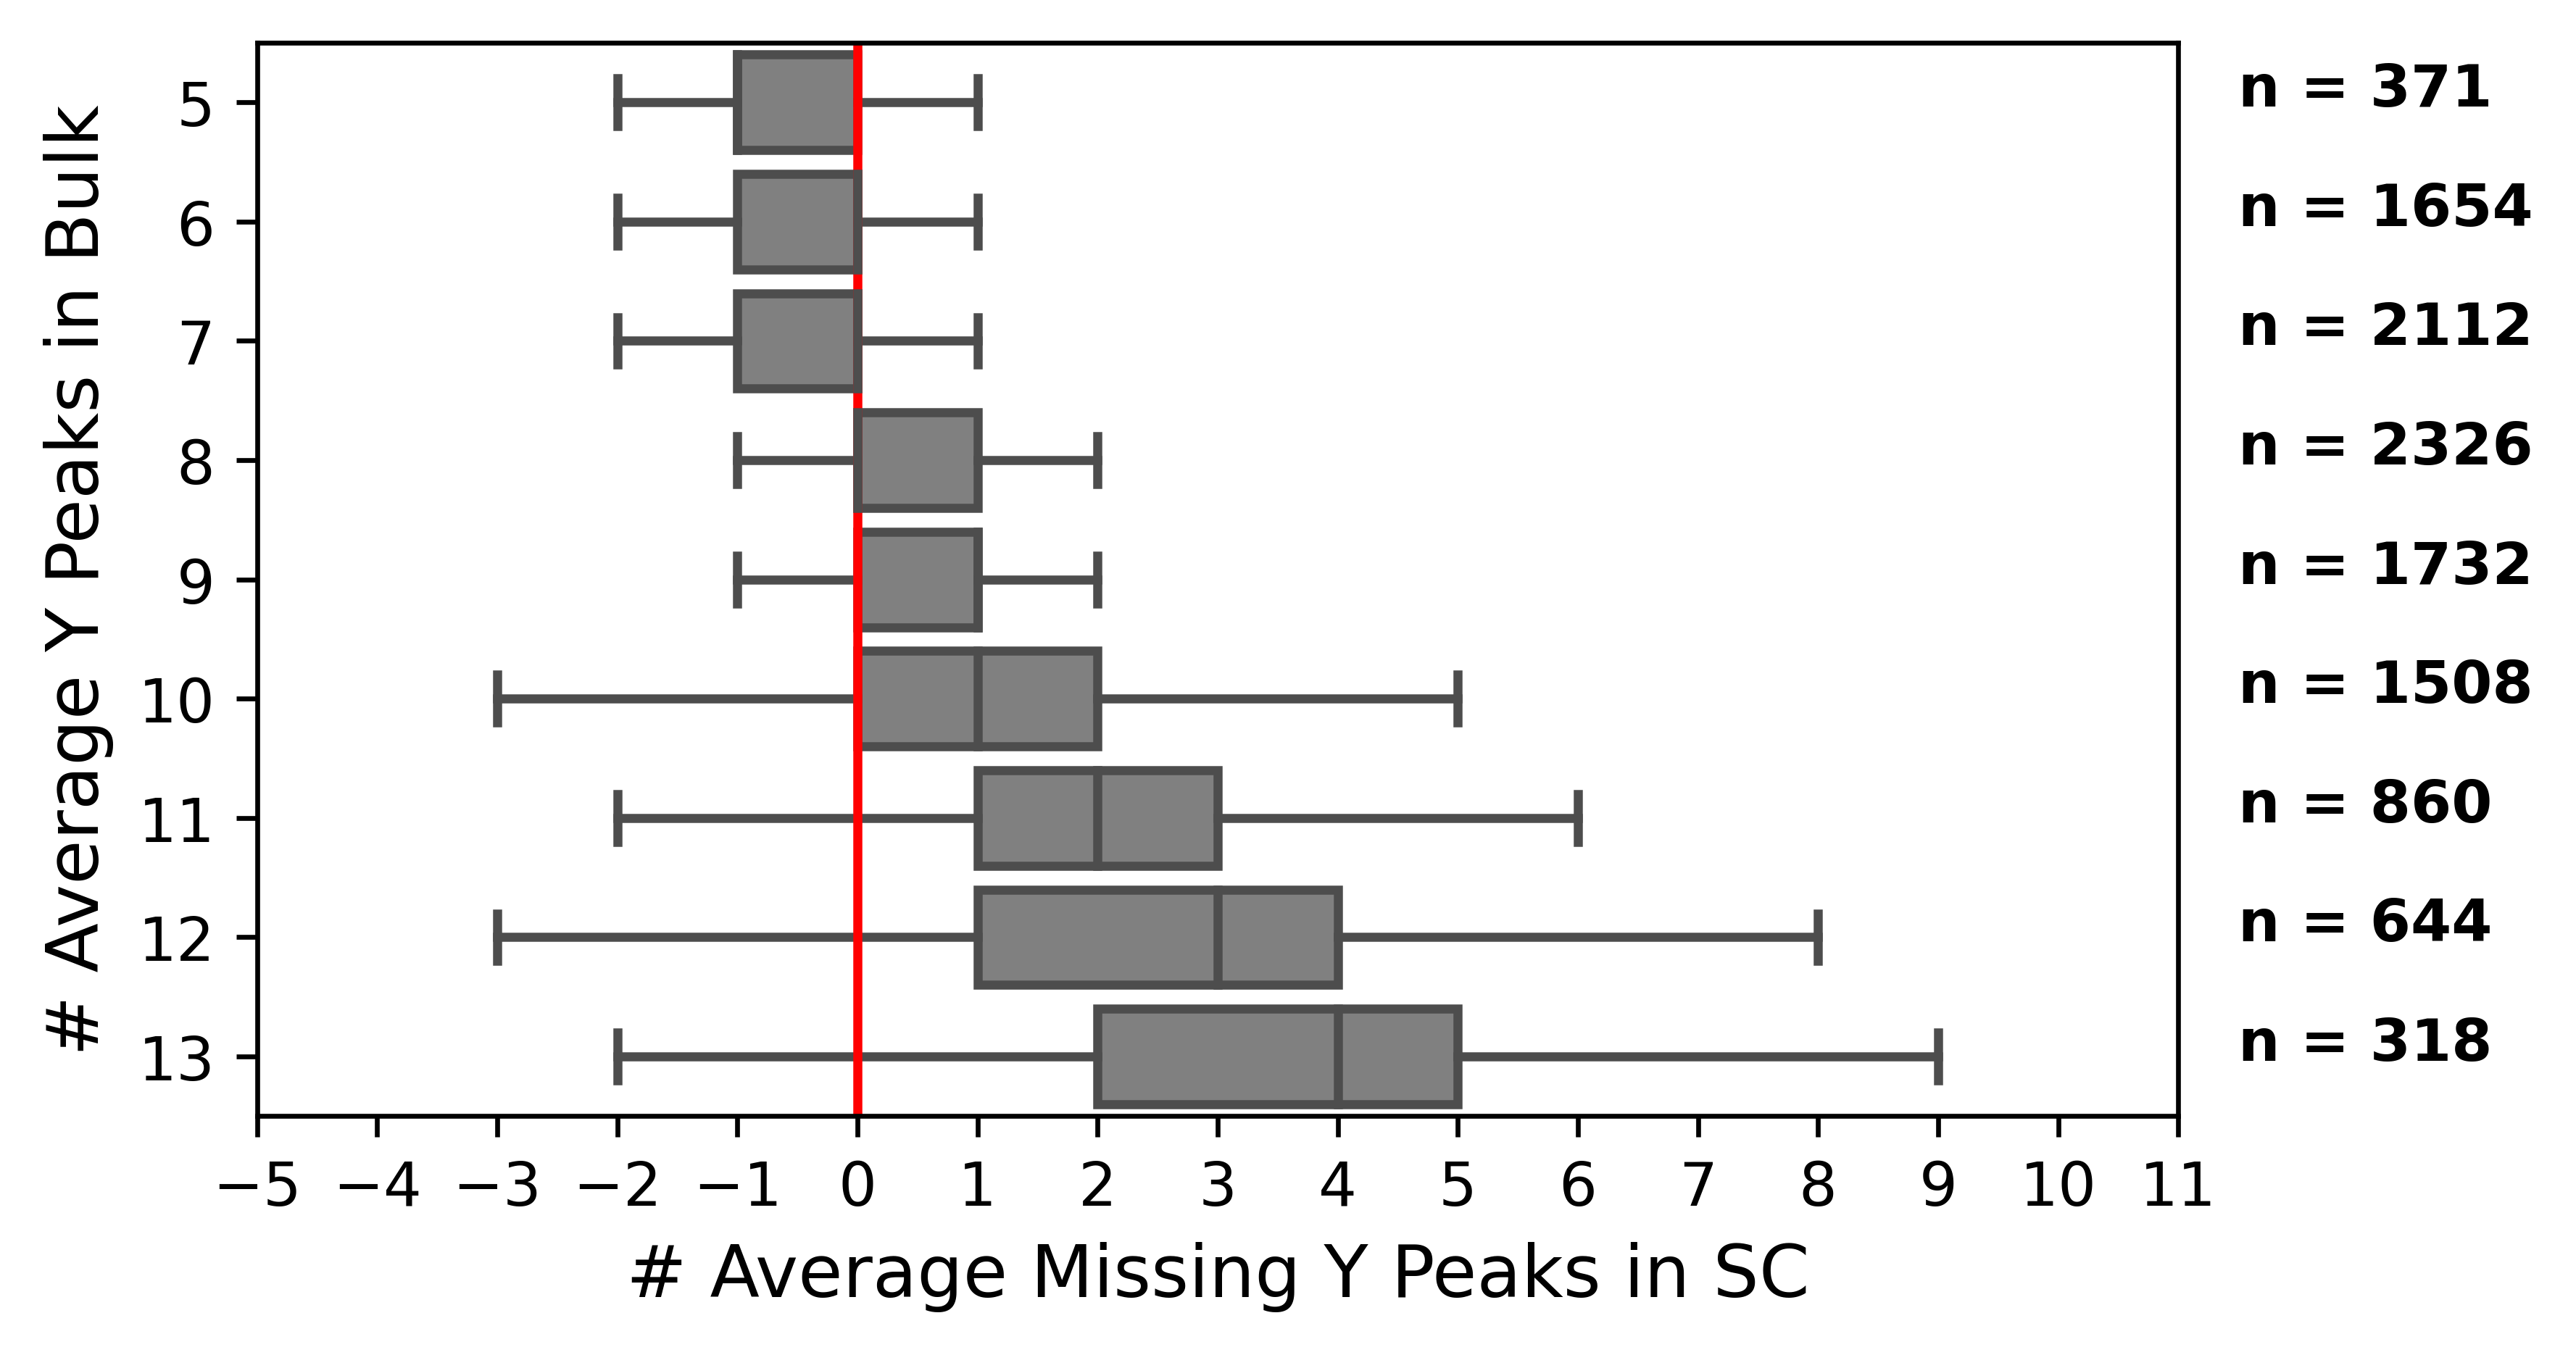

In [119]:
#make 2ng good missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_2ng_good"]]
plot_df = plot_df[plot_df['mean_Ypeaks_2ng_good'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["2ng_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_2ng_good']
plot_df[['mean_Ypeaks_bulk','2ng_missing']] = plot_df[['mean_Ypeaks_bulk','2ng_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','2ng_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

# a4_dims = (11.7, 8.27) #dimensions for bigger plot
a4_dims = (5.7, 3.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["2ng_missing"] ,y=box_df['mean_Ypeaks_bulk'], color="gray",ax=ax,orient="h",showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y Peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))

#inncrease text size
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 14})

# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['2ng_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(11.5, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold'
           )
    
plt.axvline(x=0, color='red') #vertical line

fig2ng_good = plt.gcf()
plt.show()

#axis should show nothing less than 100 samples 

In [21]:
371+1645+2112+2326+1732+1508+860+644+318

11516

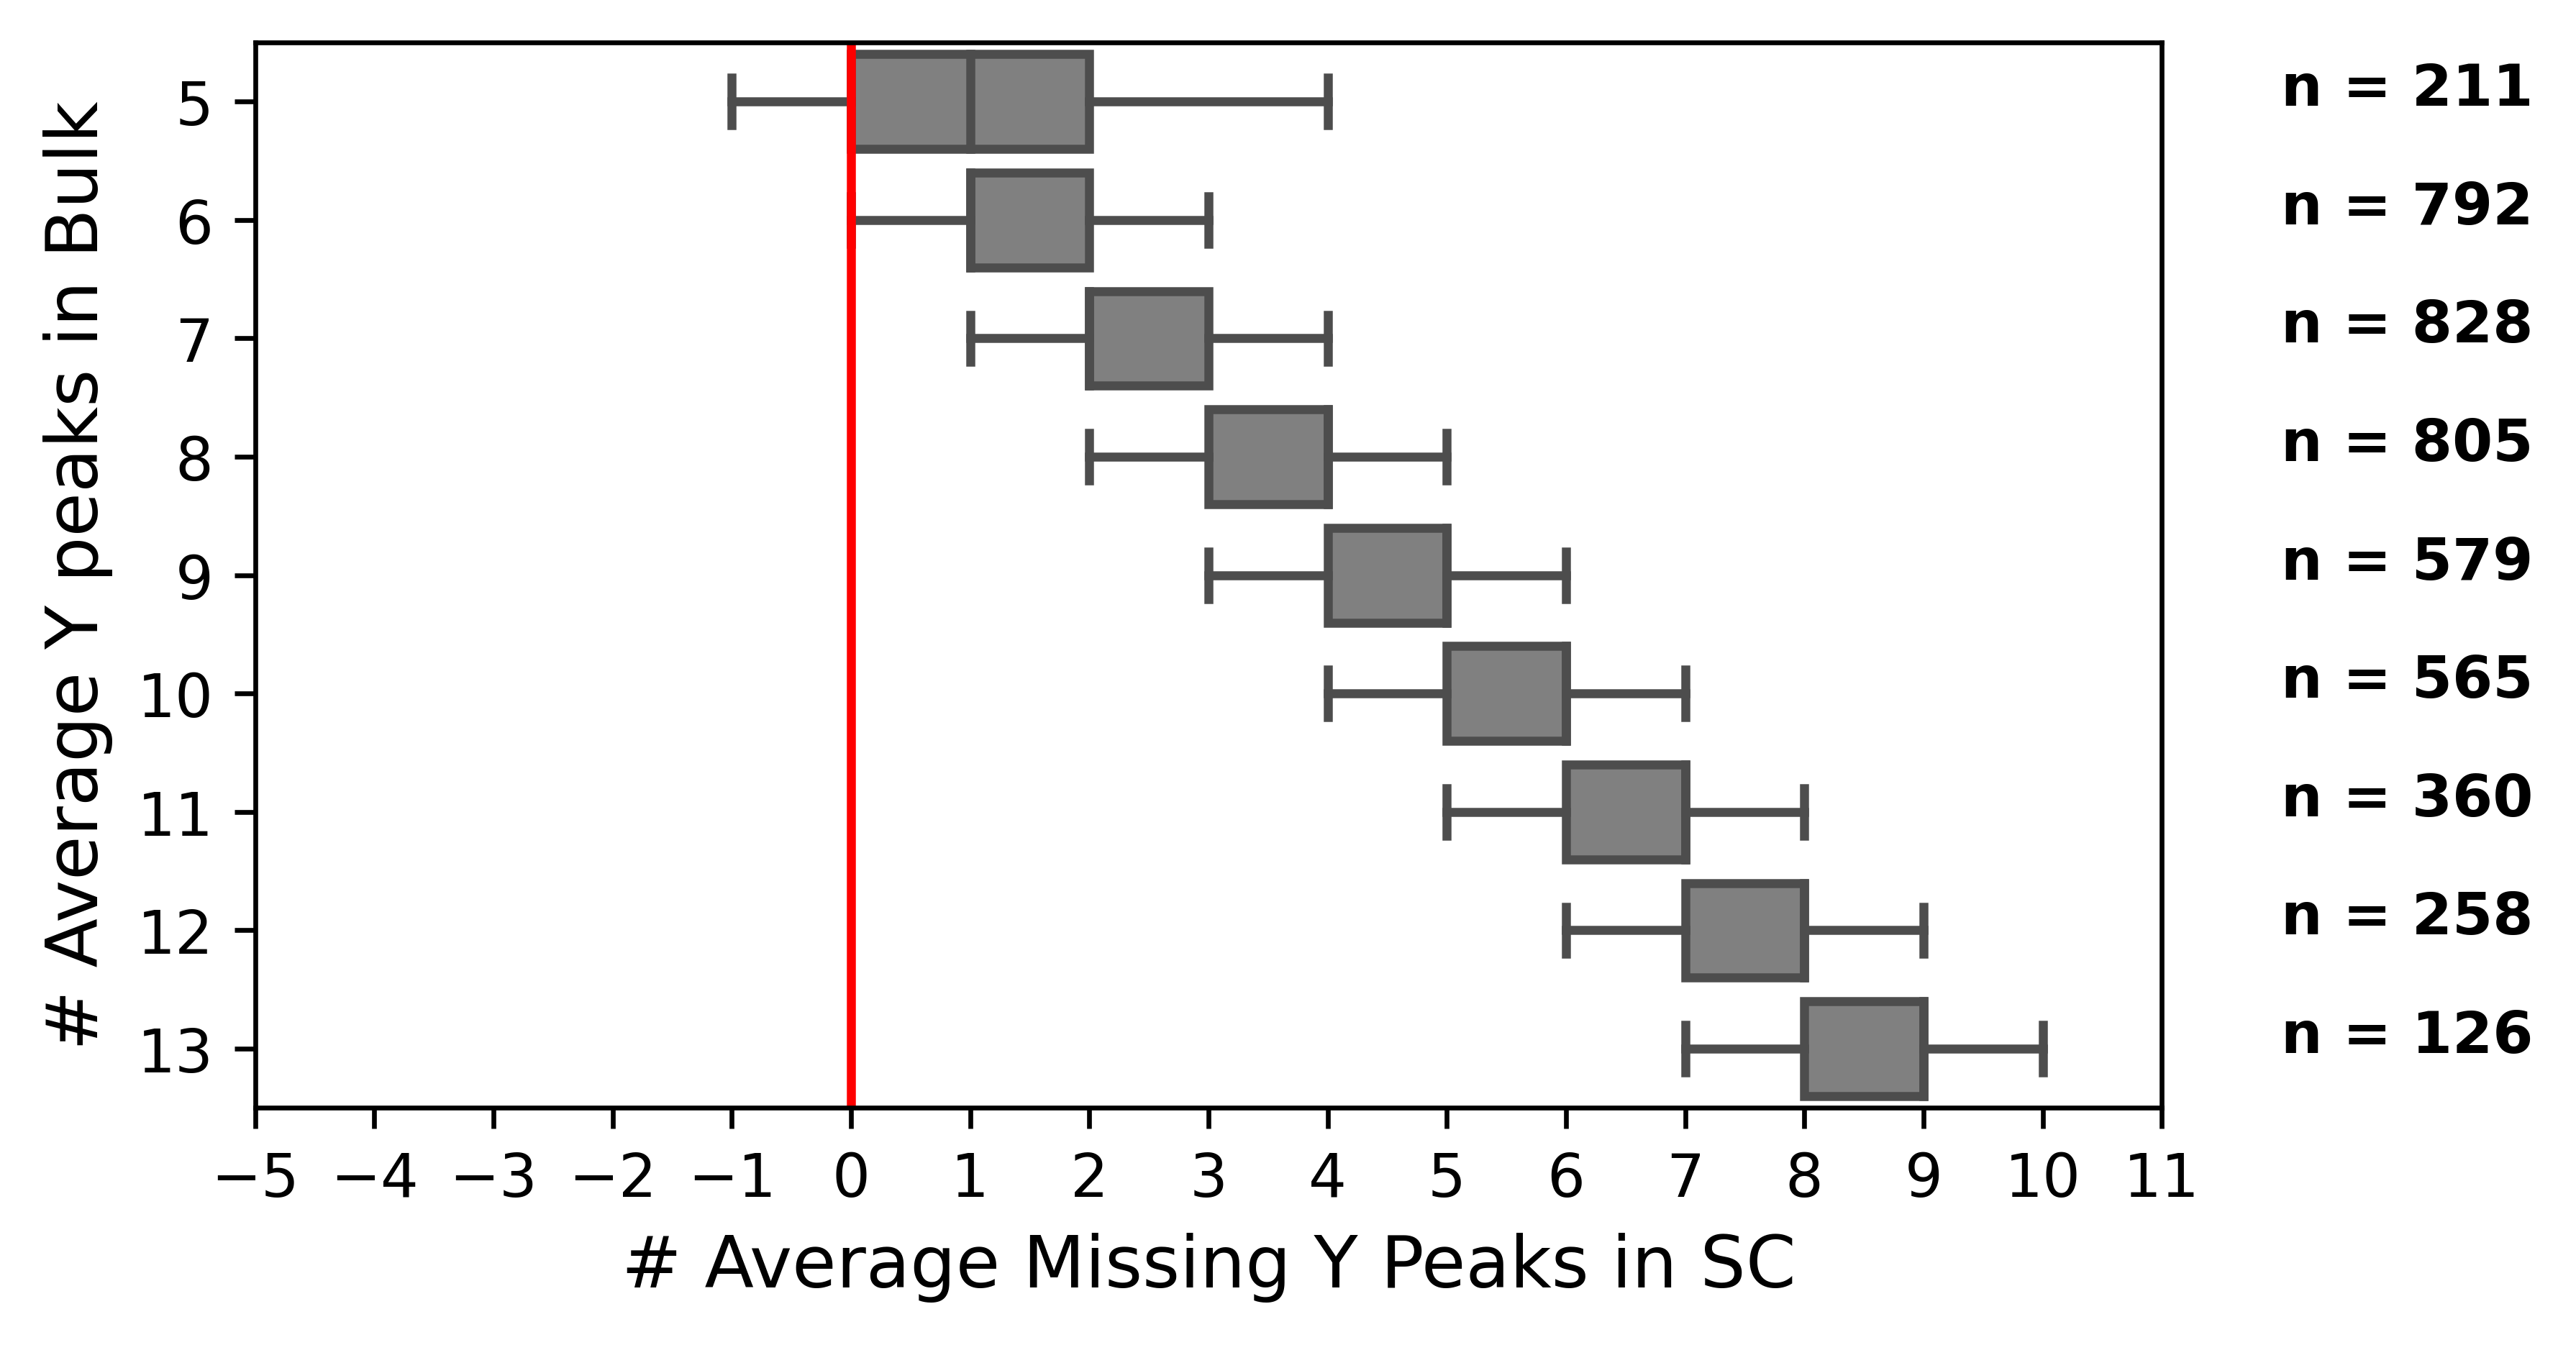

In [120]:
#make 2ng marginal missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_2ng_med"]]
plot_df = plot_df[plot_df['mean_Ypeaks_2ng_med'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["2ng_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_2ng_med']
plot_df[['mean_Ypeaks_bulk','2ng_missing']] = plot_df[['mean_Ypeaks_bulk','2ng_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','2ng_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

a4_dims = (5.7, 3.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["2ng_missing"] ,y=box_df['mean_Ypeaks_bulk'], ax=ax,orient="h", color='gray',showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))

#inncrease text size
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 14})

# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['2ng_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(12, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold')

plt.axvline(x=0, color='red') #vertical line
    
fig2ng_med = plt.gcf()
plt.show()


#axis should show nothing less than 100 samples 

# Graph for 0.2ng data

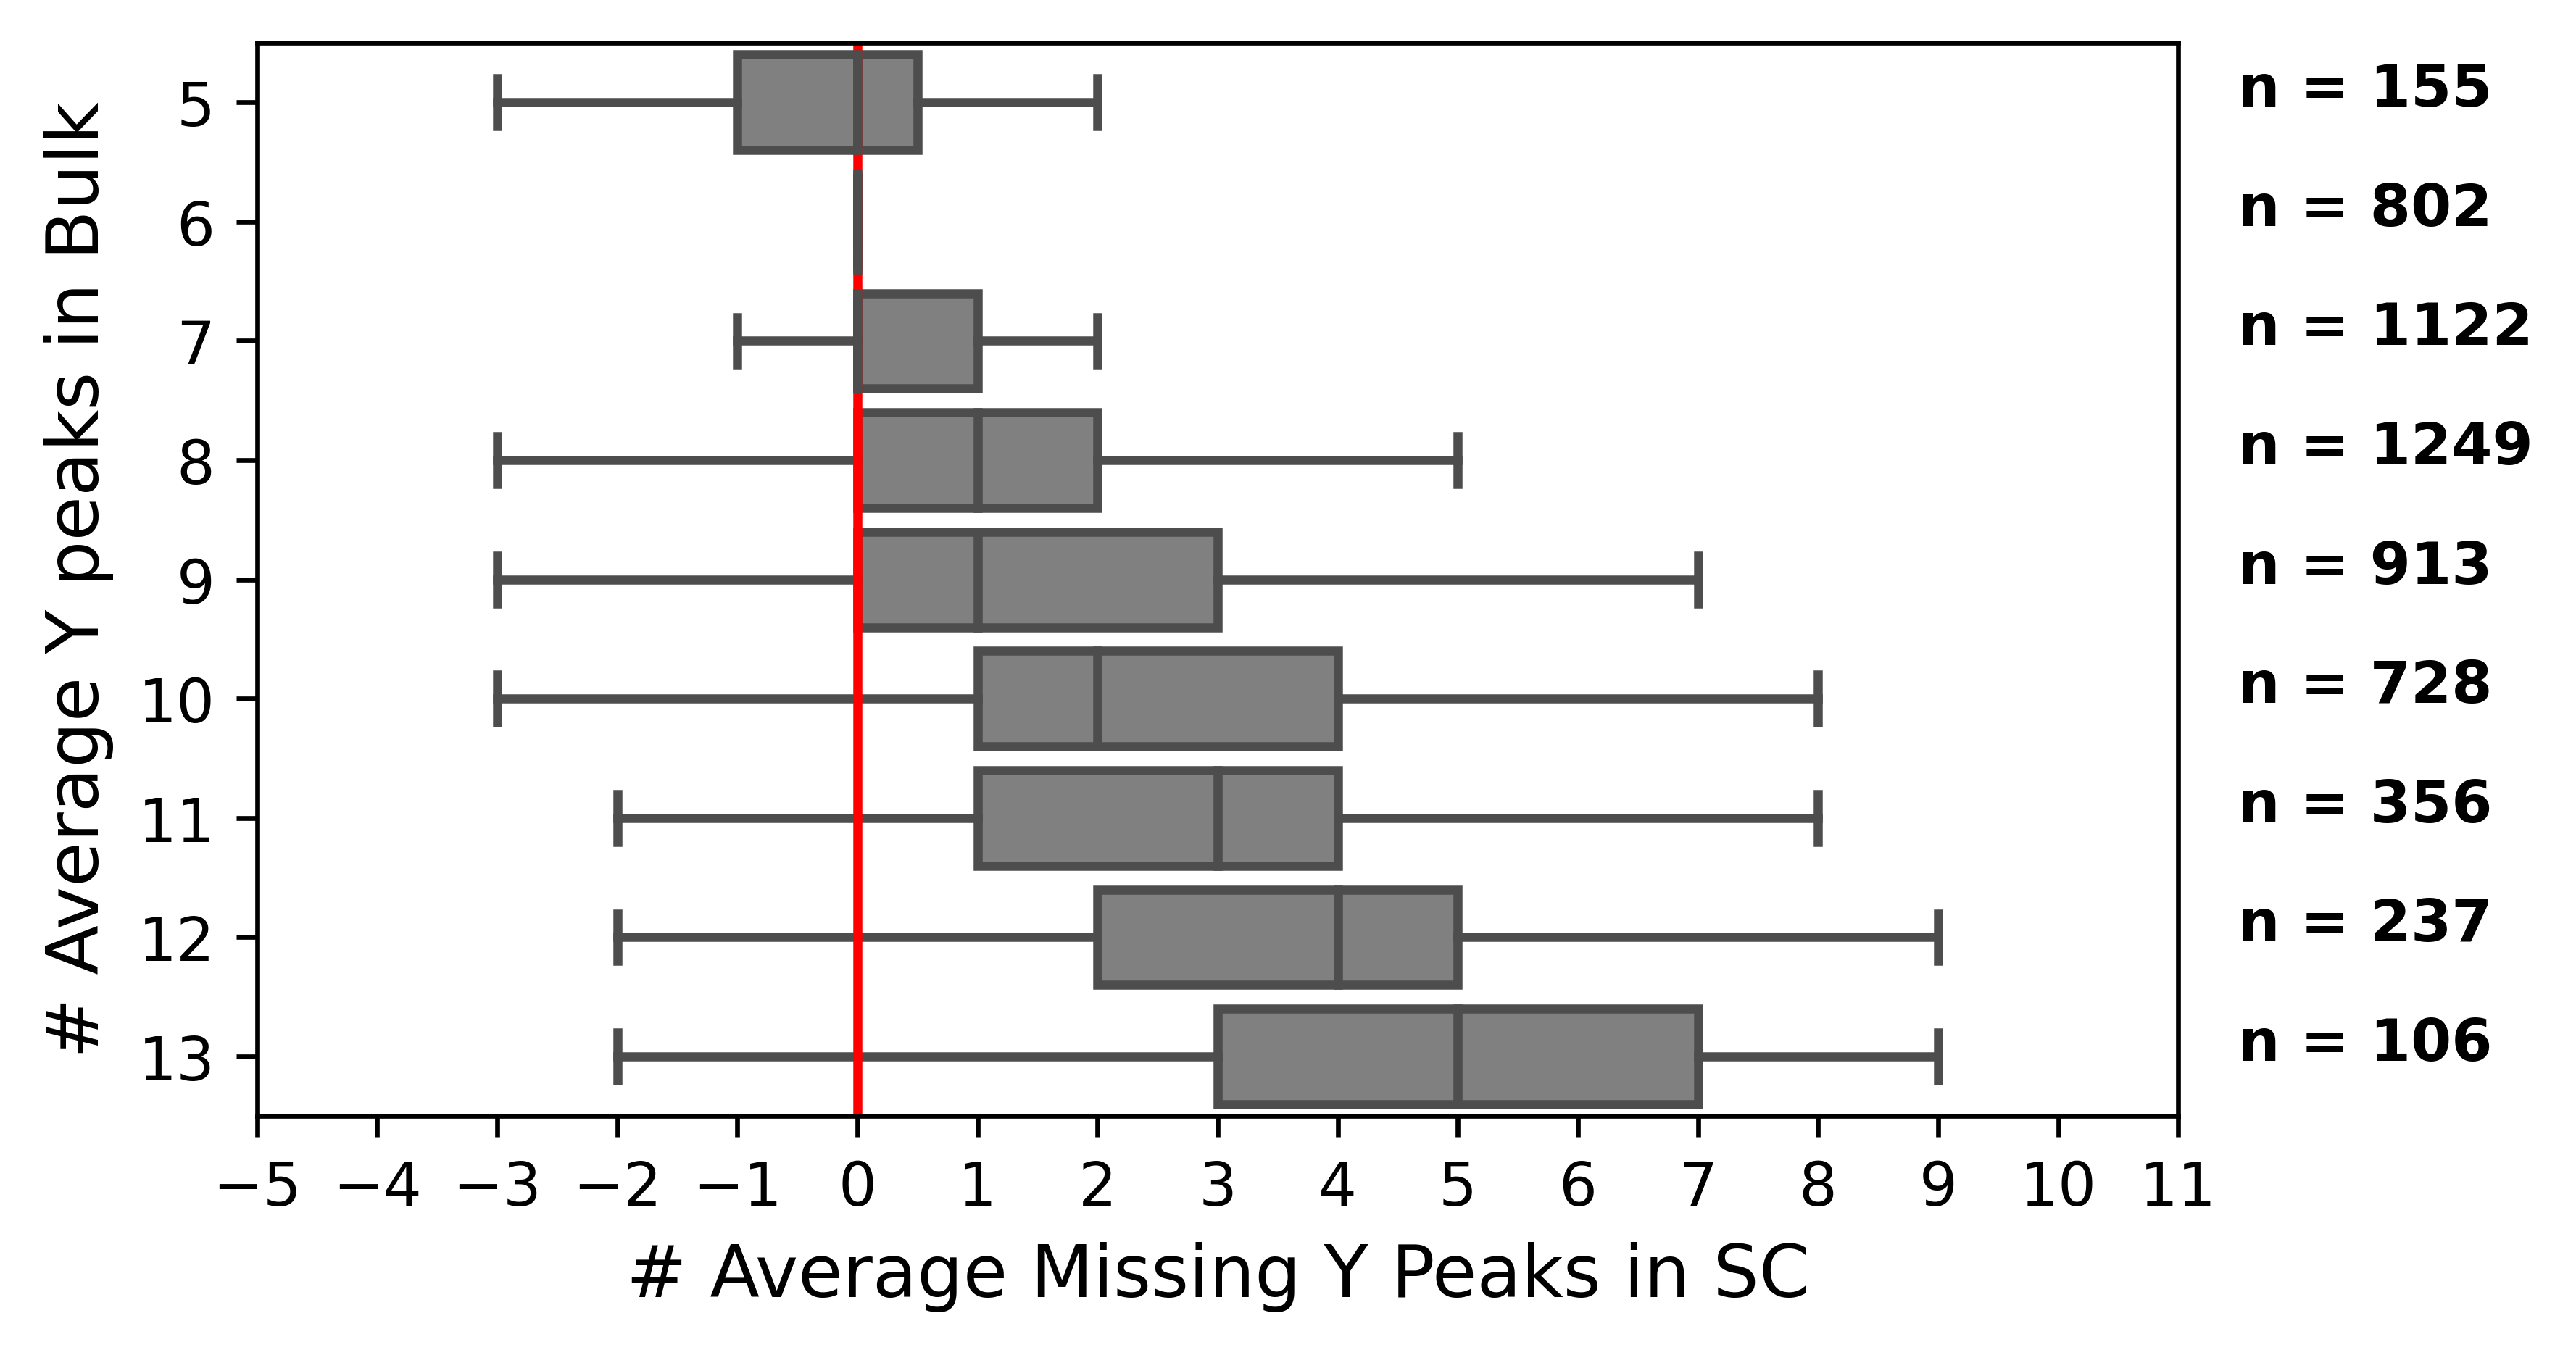

In [121]:
#make 0.2ng good missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_0.2ng_good"]]
plot_df = plot_df[plot_df['mean_Ypeaks_0.2ng_good'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["2ng_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_0.2ng_good']
plot_df[['mean_Ypeaks_bulk','2ng_missing']] = plot_df[['mean_Ypeaks_bulk','2ng_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','2ng_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

a4_dims = (5.7, 3.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["2ng_missing"] ,y=box_df['mean_Ypeaks_bulk'], ax=ax,orient="h", color='gray',showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))
plt.rcParams.update({'font.size': 14})

# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['2ng_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(11.5, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold')
    
plt.axvline(x=0, color='red') #vertical line

fig02ng_good = plt.gcf()
plt.show()

#axis should show nothing less than 100 samples 

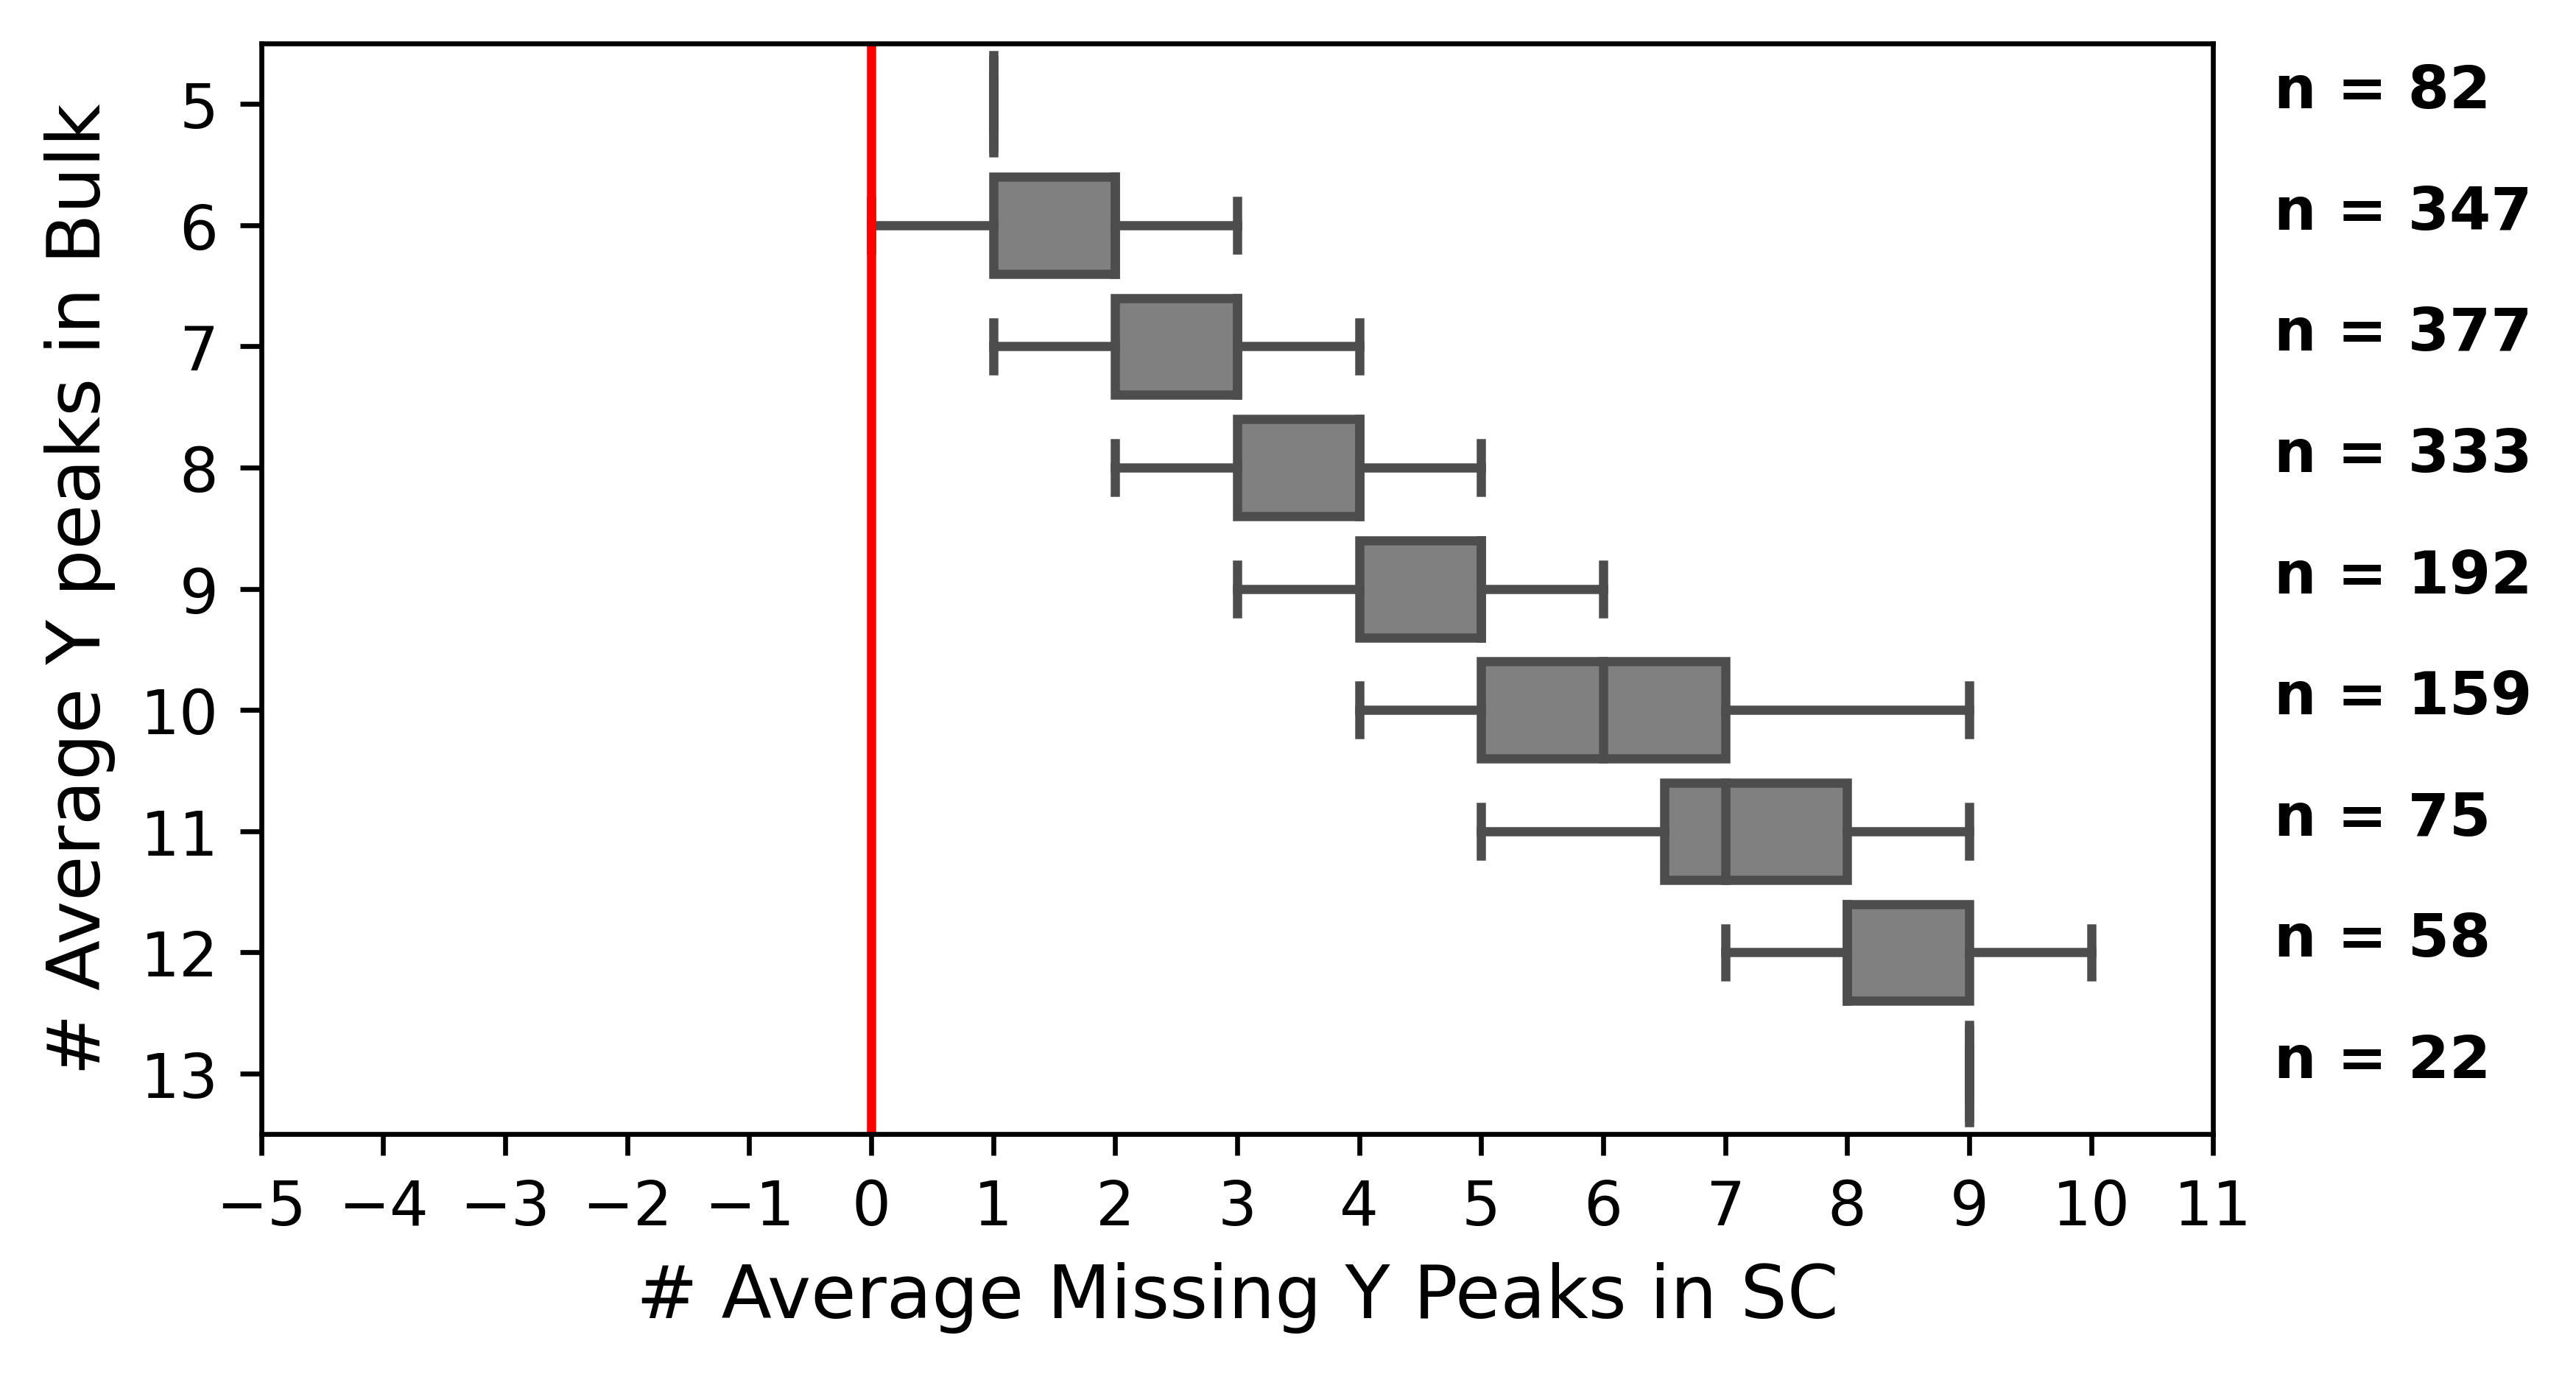

In [122]:
#make 0.2ng mediocre missing peak graph
# calc missing peaks
plt.rcParams.update({'font.size': 12})

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_0.2ng_med"]]
plot_df = plot_df[plot_df['mean_Ypeaks_0.2ng_med'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["2ng_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_0.2ng_med']
plot_df[['mean_Ypeaks_bulk','2ng_missing']] = plot_df[['mean_Ypeaks_bulk','2ng_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','2ng_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]

a4_dims = (5.7, 3.27)#dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["2ng_missing"] ,y=box_df['mean_Ypeaks_bulk'], ax=ax,orient="h", color='gray',showfliers=False)
boxplot.set_title("")
boxplot.set(xlabel="# Average Missing Y Peaks in SC",ylabel="# Average Y peaks in Bulk")
# plt.xticks(list(range(min(box_df["2ng_missing"]), max(box_df["2ng_missing"])+1)))
plt.xticks(list(range(-5,12)))

plt.rcParams.update({'font.size': 14})
# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['2ng_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(11.5, #x corrdinate
            pos[tick] + 0.03, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size='x-small',
            color='black',
            weight='semibold')
    
plt.axvline(x=0, color='red') #vertical line
plt.rcParams["figure.dpi"] = 600

fig02ng_med = plt.gcf()
plt.show()

#axis should show nothing less than 100 samples 

In [123]:
plt.rcParams["figure.dpi"] = 600
figsc_good.savefig('Figures/figure2A.jpg',bbox_inches='tight', dpi=600)
figsc_med.savefig('Figures/figure2B.jpg',bbox_inches='tight', dpi=600)

fig2ng_good.savefig('Figures/supplemental_figure1A.jpg',bbox_inches='tight', dpi=600)
fig2ng_med.savefig('Figures/supplemental_figure1B.jpg',bbox_inches='tight', dpi=600)

fig02ng_good.savefig('Figures/supplemental_figure1C.jpg',bbox_inches='tight', dpi=600)
fig02ng_med.savefig('Figures/supplemental_figure1D.jpg',bbox_inches='tight', dpi=600)


We're going to make a table that has a peptide as the index. For each peptide we will count the average number of peaks that occur in all files and every occurance within the file. 


We're going to be looking at the average number of peaks across replicates. 
For example if in bulk data we have AAA in all 3 replicates, we'll take the average # of peaks from all repliacates.
If BBB exists in only 2 replicates we'll take the average of 2
If CCC only exists in 1, then that will be taken as the average

# How many peptides have confident identification

In [26]:
len(bulk_allreps.index)

38977

# Old code for checking stuff

In [ ]:
#make sc good missing peak graph
# calc missing peaks

plot_df = megatable[["mean_Ypeaks_bulk", "mean_Ypeaks_sc_good"]]
plot_df = plot_df[plot_df['mean_Ypeaks_sc_good'].notna()]
plot_df = plot_df[plot_df['mean_Ypeaks_bulk'].notna()]
plot_df["sc_missing"] = plot_df['mean_Ypeaks_bulk']-plot_df['mean_Ypeaks_sc_good']
plot_df[['mean_Ypeaks_bulk','sc_missing']] = plot_df[['mean_Ypeaks_bulk','sc_missing']].astype(int)
box_df = plot_df[['mean_Ypeaks_bulk','sc_missing']]
box_df = box_df[(box_df['mean_Ypeaks_bulk'] >= 5) & (box_df['mean_Ypeaks_bulk'] <= 13)]


a4_dims = (3, 2)
fig, ax = plt.subplots(figsize=a4_dims)

boxplot = sns.boxplot(data=box_df, x=box_df["sc_missing"] ,y=box_df['mean_Ypeaks_bulk'], color="gray",ax=ax,orient="h",showfliers=False)
boxplot.set_title("")
plt.xlabel('# Average Missing Y Peaks in SC', fontsize=9)
plt.ylabel('# Average Y Peaks in Bulk', fontsize=9)
plt.xticks(list(range(-5,12)), fontsize=7)
plt.yticks(fontsize=7)


# Calculate number of obs per group & median to position labels
medians = box_df.groupby(['sc_missing'])['mean_Ypeaks_bulk'].median().values #used for x axis ( or it would be if we used it)
nobs = box_df['mean_Ypeaks_bulk'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs] 
 
# Add it to the plot
pos = range(len(nobs)) #used for y axis
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(12.5, #x corrdinate
            pos[tick] + 0.06, #y corrdinate
            nobs[tick], #texr
            horizontalalignment='left',
            size=5,
            color='black',
            weight='semibold'
           )
    
plt.axvline(x=0, color='red') #vertical line

figsc_good = plt.gcf()
plt.show()

#axis should show nothing less than 100 samples 

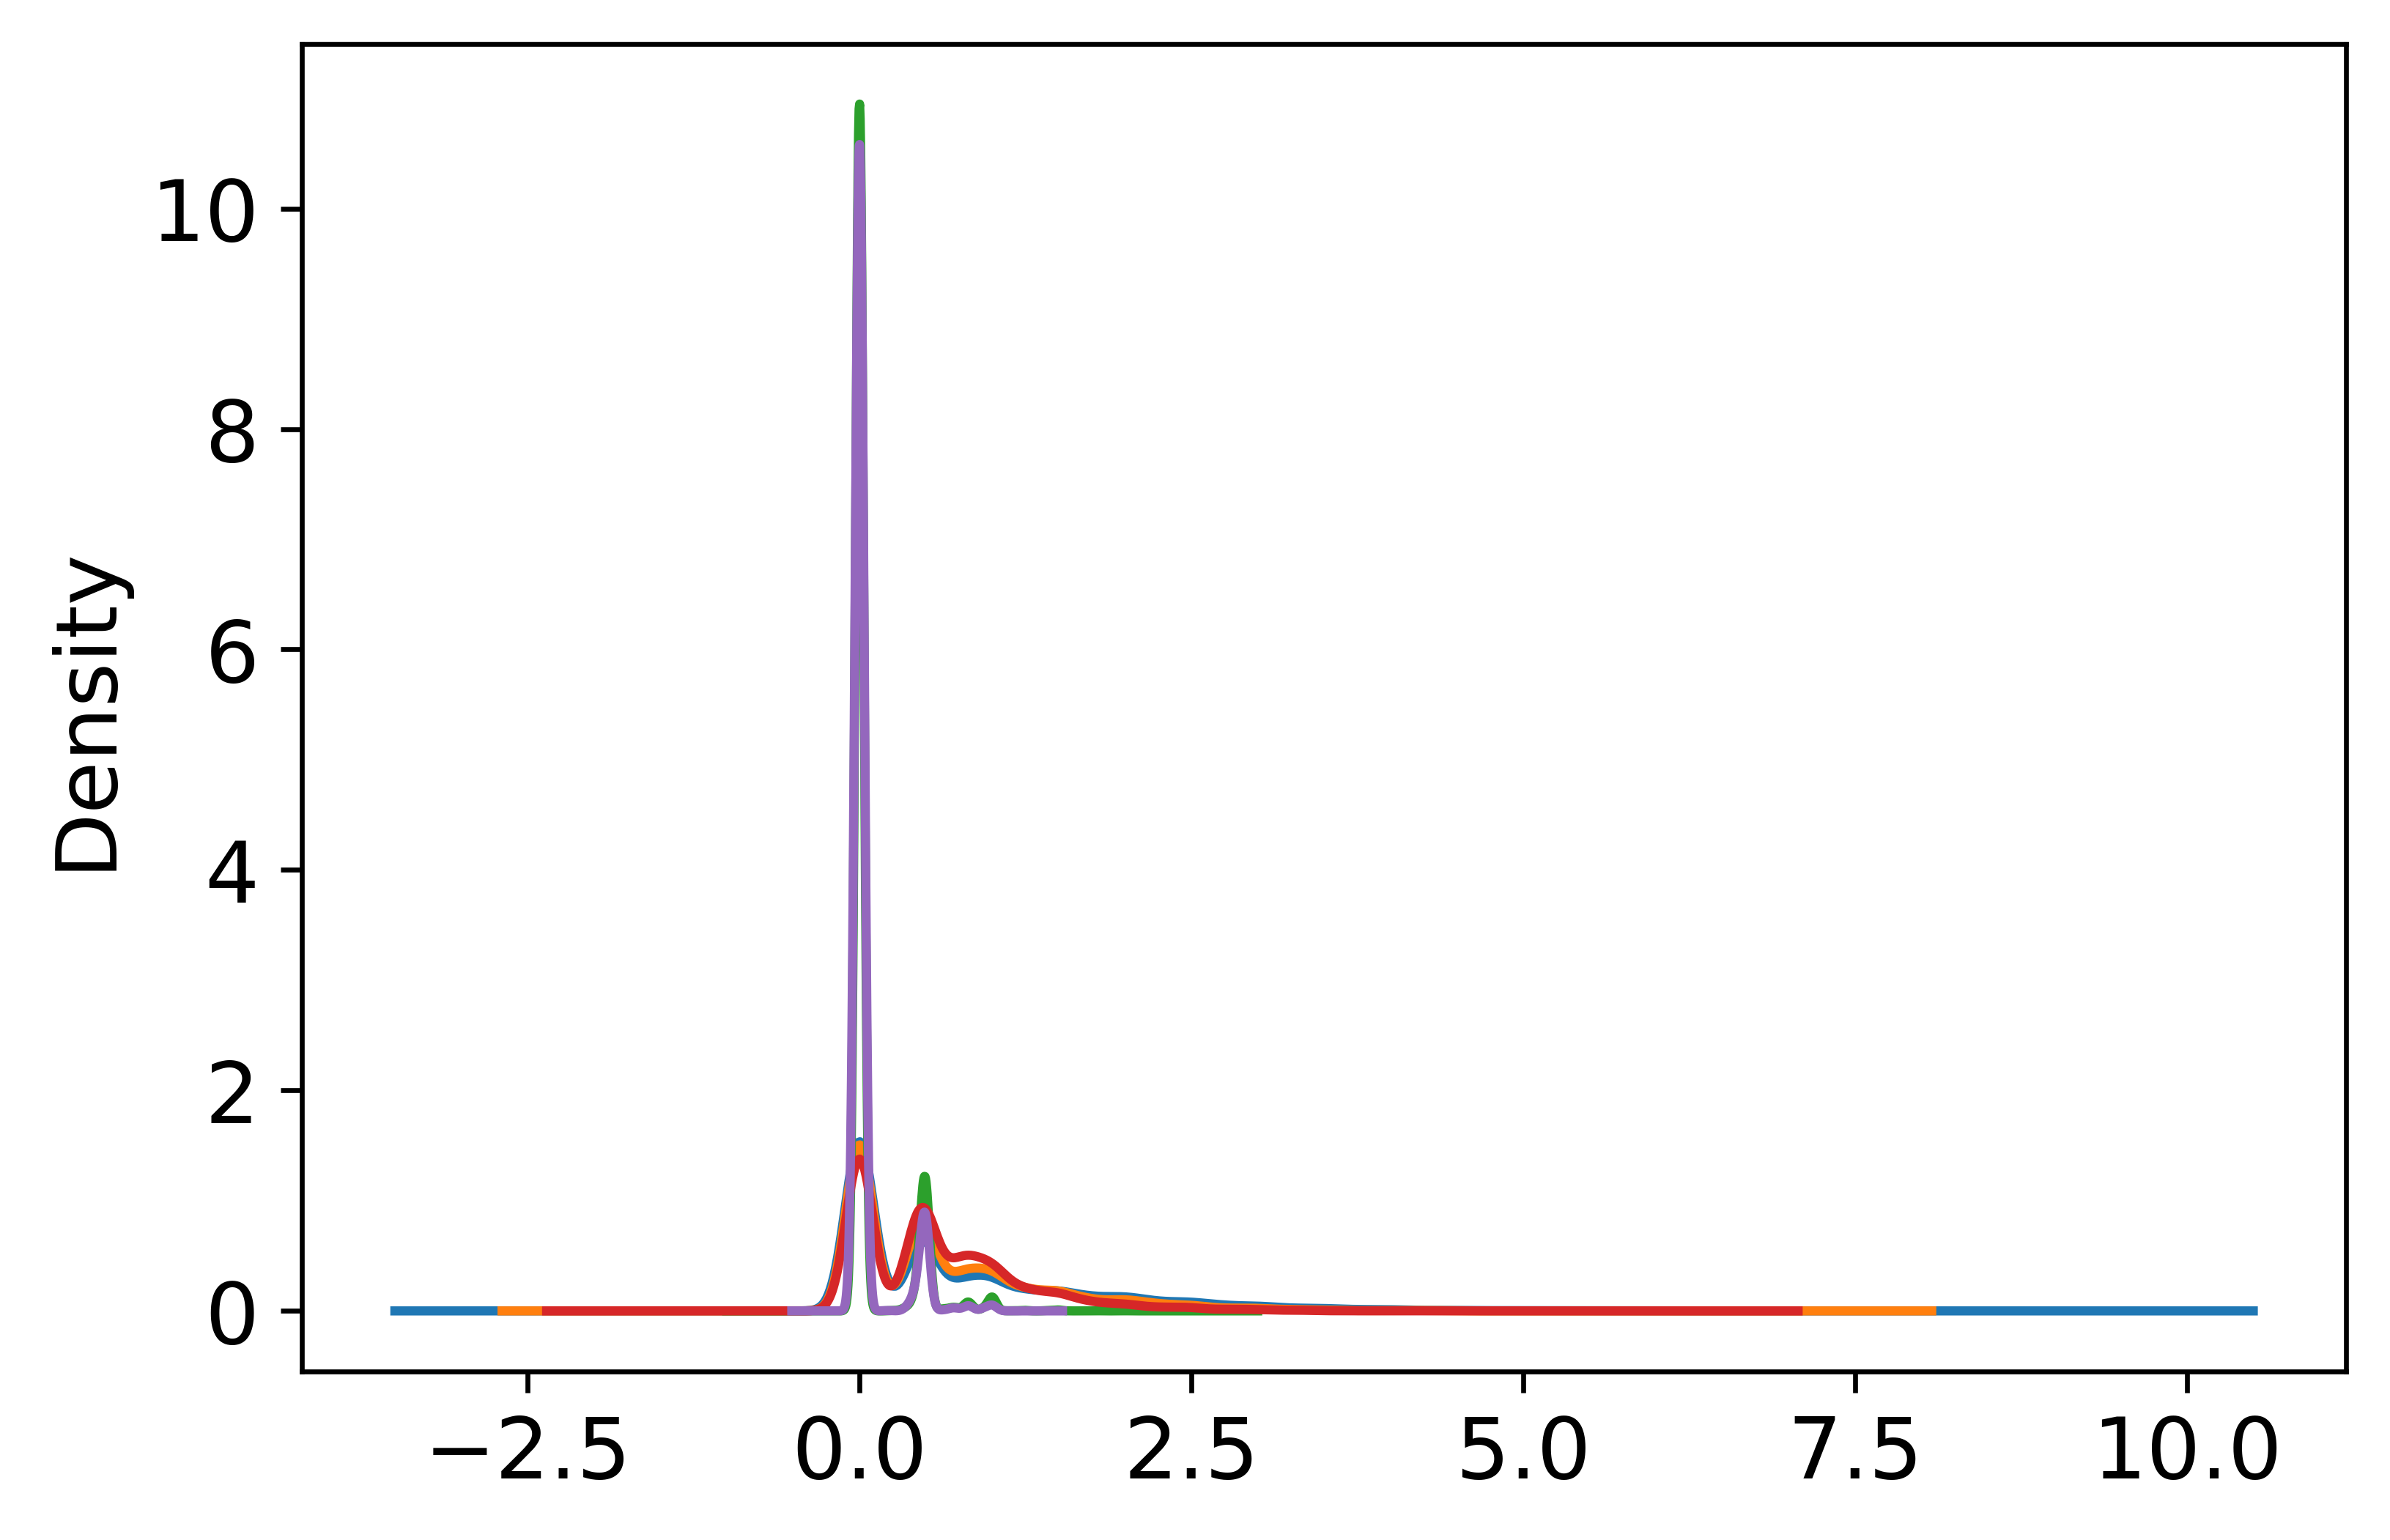

In [27]:
#check stand deviation
megatable['sd_Ypeaks_bulk'].plot.density()

megatable['sd_Ypeaks_2ng_good'].plot.density()

megatable['sd_Ypeaks_2ng_med'].plot.density()

megatable['sd_Ypeaks_0.2ng_good'].plot.density()

megatable['sd_Ypeaks_0.2ng_med'].plot.density()